<a href="https://colab.research.google.com/github/Salami-Mary/Urban-Rooftop-Detection-and-Modelling-/blob/main/Rooftop_Object_Detection_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



- Setting up the environment & downloading the API

### 1.Installing  the python dependencies

In [ ]:
!pip install tensorflow pillow Cython lxml jupyter matplotlib

## 1.2 Download the Tensorfflow Object Detection

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 46984 (delta 9), reused 22 (delta 1), pack-reused 46954
Receiving objects: 100% (46984/46984), 551.63 MiB | 35.18 MiB/s, done.
Resolving deltas: 100% (32287/32287), done.


## 1.3 Switch to the research folder of the dowloaded API

In [ ]:
cd models/research

/content/models/research


## 1.4 Run protoc

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

## 1.5 Install Tensorflow Object Detection API

In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 8.7MB 6.7MB/s 
     |████████████████████████████████| 358kB 40.4MB/s 
     |████████████████████████████████| 849kB 55.1MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 63.8MB 45kB/s 
     |████████████████████████████████| 153kB 52.9MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 2.0MB 49.1MB/s 
     |████████████████████████████████| 829kB 48.8MB/s 
     |████████████████████████████████| 36.7MB 81kB/s 
     |████████████████████████████████| 1.1MB 51.0MB/s 
     |████████████████████████████████| 174kB 57.5MB/s 
     |████████████████████████████████| 102kB 15.5MB/s 
     |████████████████████████████████| 112kB 52.6MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1598322 sha256=88b861e475ef7240427c5bc05e

### 1.6 Switching back to the default folder

In [ ]:
cd /content

/content


In [ ]:
ls

models/  sample_data/


### 2: Downloading the Image data 

### 2.1 Downloading the files from source of interest

In [ ]:
!curl -O https://africa4ai.com/files/preprocessing.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5253k  100 5253k    0     0  3001k      0  0:00:01  0:00:01 --:--:-- 3000k


**Viewing the download file**

In [ ]:
ls

models/  preprocessing.zip  sample_data/


## 2.2 Unzip the preprocessing files

In [ ]:
!unzip -q preprocessing

## 2.3 Viewing the download file*

In [ ]:
ls

models/  preprocessing/  preprocessing.zip  sample_data/


In [ ]:
ls preprocessing/

data/                 images/          partition_dataset.py  tf_record/
generate_tfrecord.py  label_map.pbtxt  pipeline.config       xml_to_csv.py


## 2.4 Removing the zip file

In [ ]:
rm -r preprocessing.zip

# 3: Image data splitting
Train & Test folder

## 3.1 Switch to preprocessing folder

In [ ]:
cd preprocessing

/content/preprocessing


In [ ]:
ls

data/                 images/          partition_dataset.py  tf_record/
generate_tfrecord.py  label_map.pbtxt  pipeline.config       xml_to_csv.py


## 3.2 Partitioning/Splitting the dataset




In [ ]:
!python partition_dataset.py -x -i images/ -r 0.1

## 3.3 Viewing the created folders - test/ & /image**

In [ ]:
ls images/

 image10.jpg        image18.jpg  'image32 - 2.jpg'   image6.jpg
 image10.xml        image18.xml  'image32 - 2.xml'   image6.xml
'image11 - 2.jpg'   image19.jpg   image32.jpg        image7_2.jpg
'image11 - 2.xml'   image19.xml   image32.xml        image7_2.xml
 image11.jpg        image20.jpg   image33.jpg        image7.jpg
 image11.xml        image20.xml   image33.xml        image7.xml
'image12 - 2.jpg'   image21.jpg   image34.jpg        image9.jpg
'image12 - 2.xml'   image21.xml   image34.xml        image9.xml
 image12.jpg        image22.jpg   image3.jpg         preview-gallery-image1.jpg
 image12.xml        image22.xml   image3.xml         preview-gallery-image1.xml
 image17_2.jpg      image23.jpg   image4.jpg         preview-gallery-image2.jpg
 image17_2.xml      image23.xml   image4.xml         preview-gallery-image2.xml
 image17.jpg        image29.jpg   image5.jpg         test/
 image17.xml        image29.xml   image5rotate.jpg   train/
 image18_2.jpg      image30.jpg   image5rotat

### 4: Creating **bold text** tf_record
Train
Test

## 4.1 train.record creation

In [ ]:
!python generate_tfrecord.py -x images/train -l  label_map.pbtxt -o tf_record/train.record

Successfully created the TFRecord file: tf_record/train.record


## 4.2 Check the created file &  its size

In [ ]:
ls tf_record -lh

total 4.9M
-rw-r--r-- 1 root root 4.8M Nov 10 15:42 train.record


## 4.3 test.record creation

In [ ]:
!python generate_tfrecord.py -x images/test -l label_map.pbtxt -o tf_record/test.record

Successfully created the TFRecord file: tf_record/test.record


## 4.4 Check the created file & its size

In [ ]:
ls tf_record -lh

total 5.5M
-rw-r--r-- 1 root root 613K Nov 10 15:42 test.record
-rw-r--r-- 1 root root 4.8M Nov 10 15:42 train.record


### 5: converting XML file to CSV file 
Train
Test

## 5.1 Run xml_to_csv.py 

In [ ]:
!python xml_to_csv.py

Successfully converted xml to csv.
Successfully converted xml to csv.


## 5.2 Check the created files

In [ ]:
ls data/ -lh

total 164K
-rw-r--r-- 1 root root  19K Nov 10 15:42 test_labels.csv
-rw-r--r-- 1 root root 142K Nov 10 15:42 train_labels.csv


#  6 - Training Preparation




## 6.1 Switch back to the default folder

In [ ]:
cd /content

/content


## 6.2 Create training_folder

In [ ]:
mkdir training_folder

## 6.3 Switch to training_folder

In [ ]:
cd training_folder

/content/training_folder


## 6.4 Create the following  folders
annotations
exported-models
models
pre-trained-models

In [ ]:
#annotations
!mkdir annotations

In [ ]:
#exported-models
!mkdir exported-models

In [ ]:
#models
!mkdir models

In [ ]:
#pre-trained-models
!mkdir pre-trained-models

In [ ]:
#viewing the created folders
!ls

annotations  exported-models  models  pre-trained-models


## 6.5 Populating annotations folder

### 6.5.1 Copying the tf_records files

In [ ]:
cp /content/preprocessing/tf_record/*.record   /content/training_folder/annotations/

In [ ]:
#Checking the files
!ls /content/training_folder/annotations

test.record  train.record


### 6.5.2 Copying the csv  files

In [ ]:
cp /content/preprocessing/data/*.csv   /content/training_folder/annotations/

In [ ]:
#Checking the files
!ls /content/training_folder/annotations

test_labels.csv  test.record  train_labels.csv	train.record


### 6.5.3 Copying the label_map.pbtxt

In [ ]:
cp /content/preprocessing/label_map.pbtxt   /content/training_folder/annotations/

In [ ]:
#Checking the files
!ls /content/training_folder/annotations

label_map.pbtxt  test_labels.csv  test.record  train_labels.csv  train.record




# 7: download Pre-trained model

## 7.1 Switch to pre-trained-models

In [ ]:
cd /content/training_folder/pre-trained-models

/content/training_folder/pre-trained-models


## 7.2  Download  SSD ResNet50 V1 FPN 640x640

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2020-11-10 15:42:42--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.142.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   233MB/s    in 1.0s    

2020-11-10 15:42:43 (233 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



## 7.3 SSD ResNet50 V1 FPN 640x640 - Extraction

In [ ]:
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
# Viewing the downloaded files
!ls ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/

checkpoint  pipeline.config  saved_model


## 7.4 SSD ResNet50 V1 FPN 640x640 - Compressed file removal

In [ ]:
!rm ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

## 7.5 Make my_ssd_resnet50_v1_fpn folde in models folder

In [ ]:
!mkdir /content/training_folder/models/my_ssd_resnet50_v1_fpn

In [ ]:
!ls /content/training_folder/models/

my_ssd_resnet50_v1_fpn


## 7.6 Copy pipeline.config into my_ssd_resnet50_v1_fpn folder

In [ ]:
cp /content/preprocessing/pipeline.config  /content/training_folder/models/my_ssd_resnet50_v1_fpn

In [ ]:
ls /content/training_folder/models/my_ssd_resnet50_v1_fpn

pipeline.config


# : Model Training

## 8.1 Copy model_main_tf2.py to

In [ ]:
!cp /content/models/research/object_detection/model_main_tf2.py   /content/training_folder

## 8.2 Reset memory usage

In [ ]:
#This will reset the memory. please continue to run after experiencing error.
a = []
while(1):
    a.append('1')

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=1966c67fc9b90ef4f89c61b52f4cac154b8a8f3a1b736883256f485e633df64e
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 110.2 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


## 8.3 Switching  to Training_Folder

In [ ]:
cd /content/training_folder/

/content/training_folder


#### 8.4 Checking memory usage

## 8.5 Training  the model

In [ ]:
ls

annotations/  exported-models/  model_main_tf2.py  models/  pre-trained-models/


In [ ]:
!python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

2020-11-10 15:44:47.962680: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-10 15:44:52.568878: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-10 15:44:52.620220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-10 15:44:52.620874: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-10 15:44:52.620921: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-10 15:44:52.845637: I tensorflow/stream_executor/platform/default

In [ ]:
ls

annotations/      exporter_main_v2.py  models/
exported-models/  model_main_tf2.py    pre-trained-models/


##  9: Model Testing

## 9.1 Copy exporter_main_v2.py into training_folder

In [ ]:
cp /content/models/research/object_detection/exporter_main_v2.py .

## 9.2 Run exporter_main_v2.py to copy the inference

In [ ]:
!python exporter_main_v2.py input_type image_tensor --pipeline_config_path models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir models/my_ssd_resnet50_v1_fpn/ --output_directory exported-models/my_model


2020-11-10 16:12:37.160222: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-10 16:12:38.977178: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-10 16:12:39.014829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-10 16:12:39.015402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-10 16:12:39.015439: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-10 16:12:39.017267: I tensorflow/stream_executor/platform/default

## 9.3 Import the necessary python modules

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

## 9.4  loading image into numpy array

In [ ]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## 9.5 Label file

In [ ]:
ls

annotations/      exporter_main_v2.py  models/
exported-models/  model_main_tf2.py    pre-trained-models/


In [ ]:
labelmap_path = 'annotations/label_map.pbtxt'

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

## 9.6 Loading the exported model

In [ ]:
tf.keras.backend.clear_session()
model = tf.saved_model.load('exported-models/my_model/saved_model')

## 9.7 Helper function for running inference 

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

## 9.8  Running the model on a test images

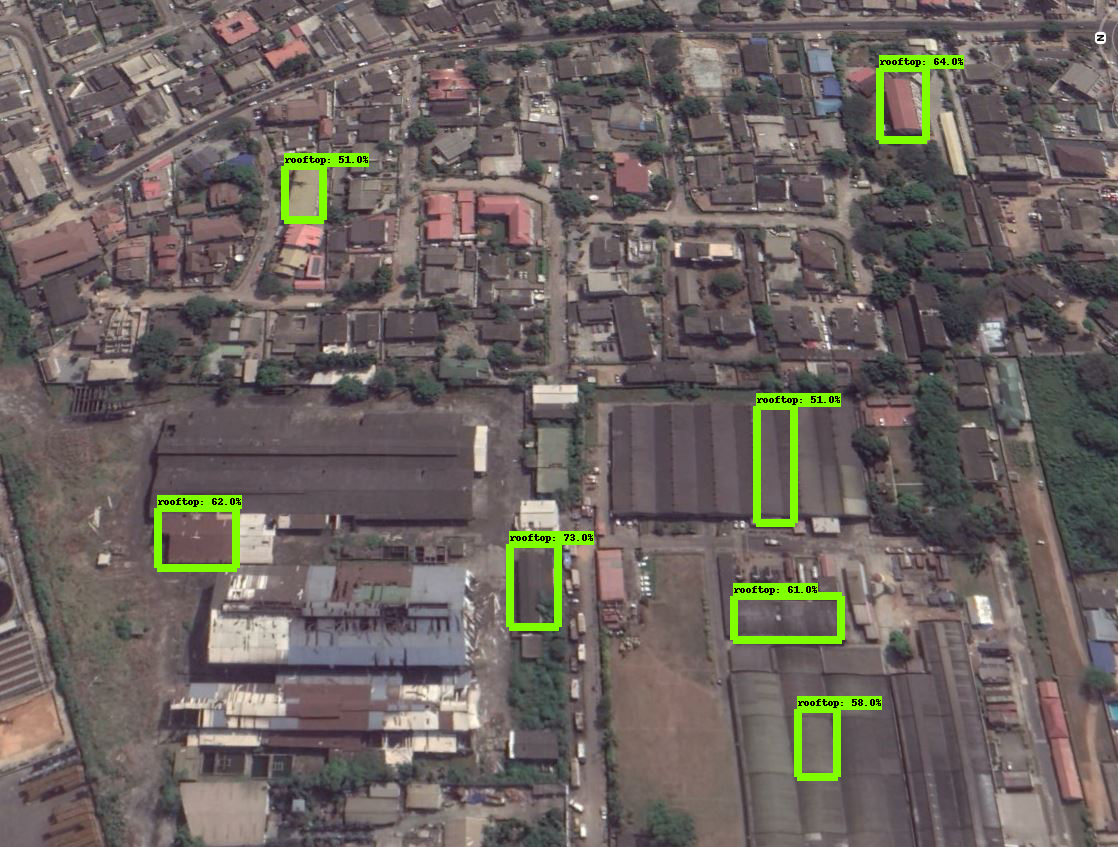

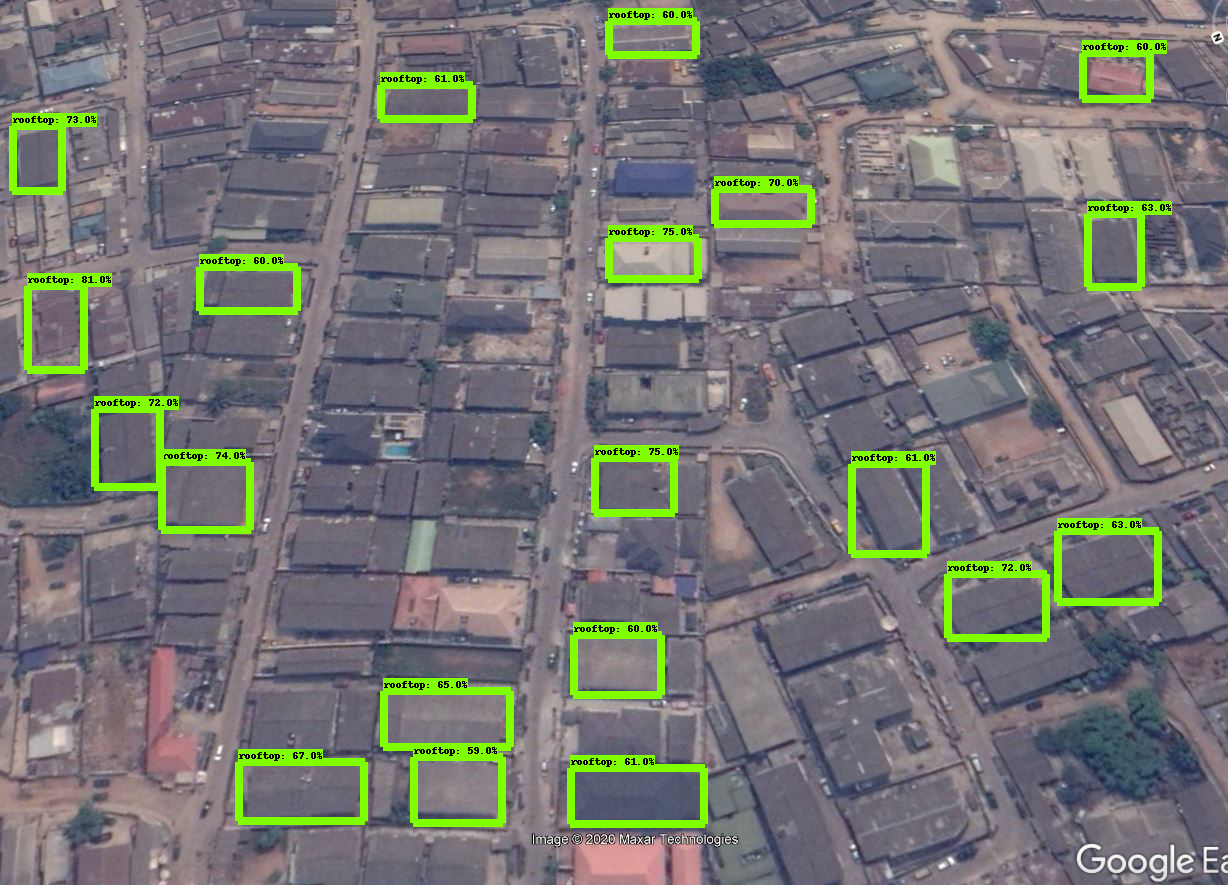

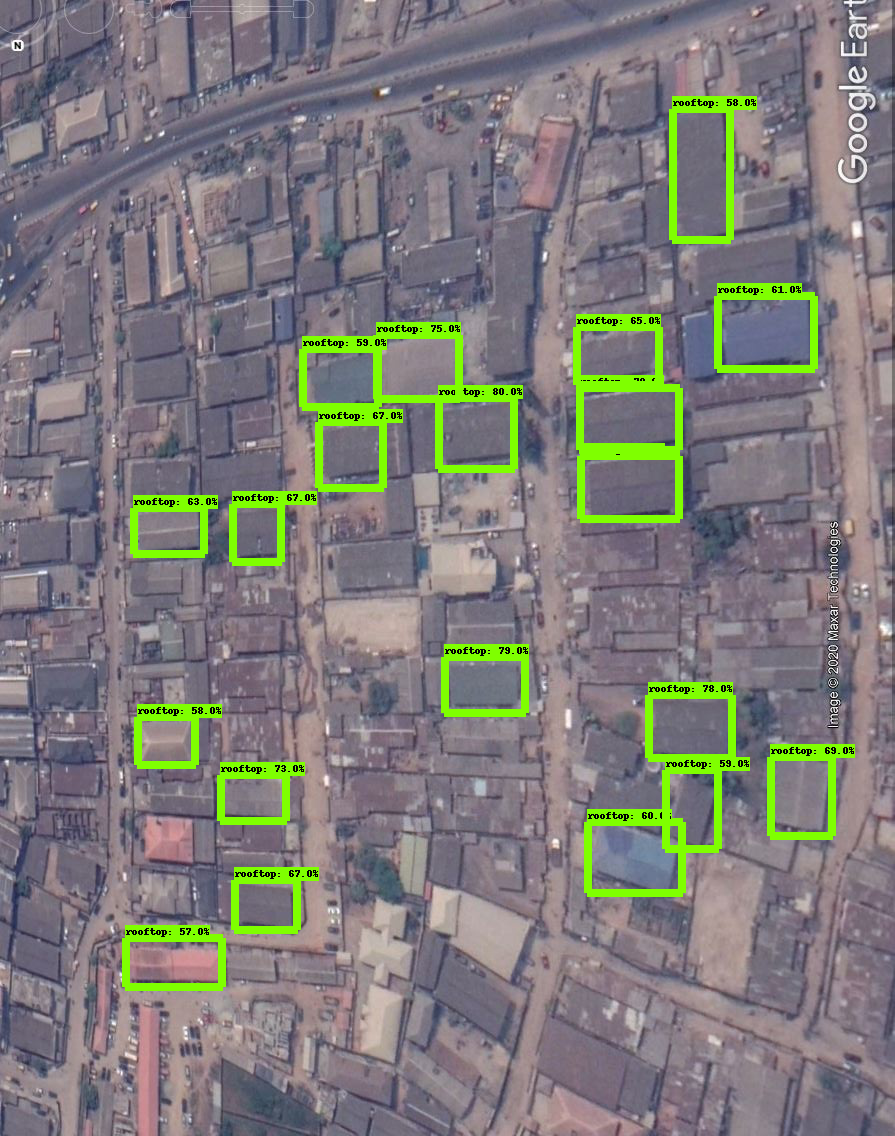

In [ ]:
%matplotlib inline
for image_path in glob.glob('/content/preprocessing/images/test/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

In [ ]:
ls  pre-trained-models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model -1h

assets/
saved_model.pb
variables/


## Downloading the model

In [ ]:
ls exported-models/my_model/saved_model

assets/  saved_model.pb  variables/


In [ ]:
#Compressing the folder
!tar -cvzf saved_model.tar.gz  exported-models/my_model/saved_model/

exported-models/my_model/saved_model/
exported-models/my_model/saved_model/saved_model.pb
exported-models/my_model/saved_model/assets/
exported-models/my_model/saved_model/variables/
exported-models/my_model/saved_model/variables/variables.data-00000-of-00001
exported-models/my_model/saved_model/variables/variables.index


In [ ]:
ls saved_model.tar.gz -lh

-rw-r--r-- 1 root root 113M Nov 10 16:14 saved_model.tar.gz


In [ ]:
#Download thezip file
from google.colab import files
files.download('saved_model.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>